# C4 Architecture Examples

In [10]:
pip install diagrams

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [138]:
from urllib.request import urlretrieve

## ------------------------------------------------------
## Our internal systems 
## ------------------------------------------------------
class OurSystems():

  def WebApp(): 
    return {
      "name" : "Web Application", 
      "technology" : "Java and Spring MVC", 
      "description" : "Delivers the static content and the Internet banking single page application."
    }

  def SPA(): 
    return { 
      "name" : "Single-Page Application",
      "technology" : "Javascript and Angular",
      "description" : "Provides all of the Internet banking functionality to customers via their web browser.",
    }

  def MobileApp(): 
    return { 
      "name" : "Mobile App",
      "technology" : "Xamarin",
      "description" : "Provides a limited subset of the Internet banking functionality to customers via their mobile device.",
    }

  def API():
    return { 
      "name" : "API Application",
      "technology" : "Java and Spring MVC",
      "description" : "Provides Internet banking functionality via a JSON/HTTPS API.",
    }

  def CustomA():
    diagrams_icon = "diagrams.png"
    urlretrieve("https://github.com/mingrammer/diagrams/raw/master/assets/img/diagrams.png", diagrams_icon)
    return { 
      "label" : "Custom Application",
      "icon_path" : diagrams_icon
    }

## ------------------------------------------------------
## Our data stores
## ------------------------------------------------------
class OurDataStores(): 

  def OracleDB(): 
    return { 
      "name" : "Database",
      "technology" : "Oracle Database Schema",
      "description" : "Stores user registration information, hashed authentication credentials, access logs, etc.",
    }

## ------------------------------------------------------
## Our external systems 
## ------------------------------------------------------
class OurExternalSystems(): 

  def Email(): 
    return { 
      "name" : "E-mail System", 
      "description" : "The internal Microsoft Exchange e-mail system.", 
      "external" : True
    }

  def Mainframe(): 
    return { 
      "name" : "Mainframe Banking System",
      "description" : "Stores all of the core banking information about customers, accounts, transactions, etc.",
      "external" : True
    }

## ------------------------------------------------------
## Our personas
## ------------------------------------------------------
class OurPersonas(): 

  def BankingCustomer(): 
    return {
      "name" : "Personal Banking Customer", 
      "description" : "A customer of the bank, with personal bank accounts."
    }


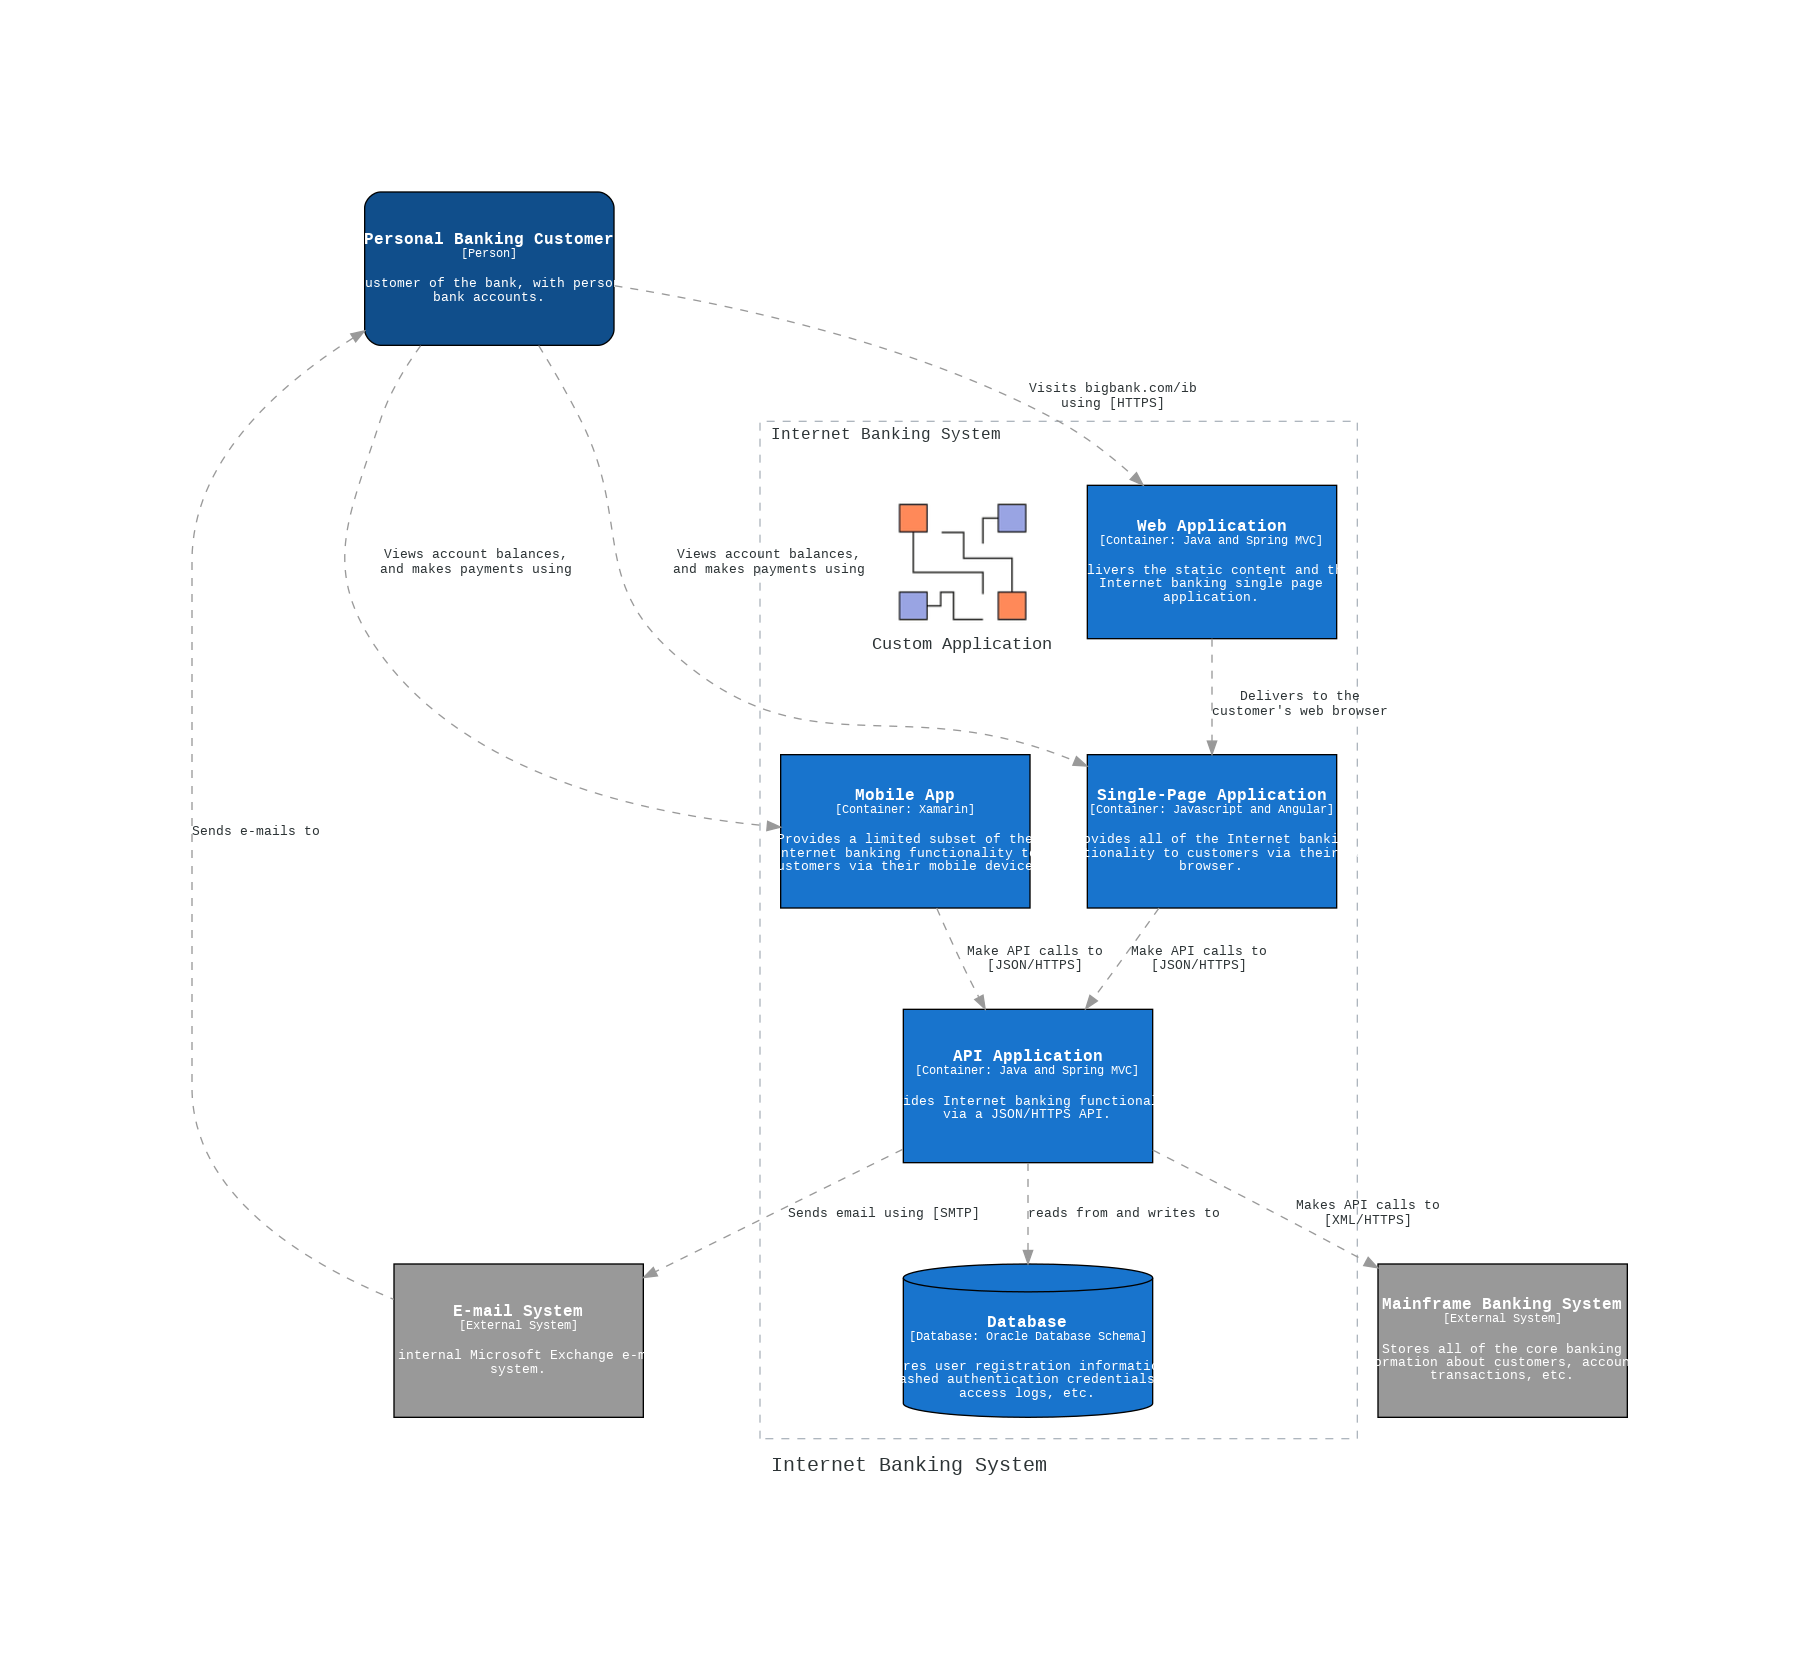

In [139]:
from diagrams import Diagram
from diagrams.c4 import Person, Container, Database, System, SystemBoundary, Relationship
from diagrams.custom import Custom

with Diagram("Internet Banking System", direction="TB", graph_attr={ "splines": "spline" }) as diag:

  ## ------------------------------------------------------
  ## Personas
  ## ------------------------------------------------------
  customer = Person( **OurPersonas.BankingCustomer() )

  ## ------------------------------------------------------
  ## Context
  ## ------------------------------------------------------

  with SystemBoundary("Internet Banking System"):
    webapp = Container( **OurSystems.WebApp() )
    spa = Container( **OurSystems.SPA() ) 
    mobileapp = Container( **OurSystems.MobileApp() ) 
    api = Container( **OurSystems.API() )

    database = Database( **OurDataStores.OracleDB() )

    diagrams = Custom( **OurSystems.CustomA() )

  email = System( **OurExternalSystems.Email() )
  mainframe = System( **OurExternalSystems.Mainframe() )

  ## ------------------------------------------------------
  ## Relationships 
  ## ------------------------------------------------------
  customer >> Relationship("Visits bigbank.com/ib using [HTTPS]") >> webapp
  customer >> Relationship("Views account balances, and makes payments using") >> [spa, mobileapp]
  webapp >> Relationship("Delivers to the customer's web browser") >> spa
  spa >> Relationship("Make API calls to [JSON/HTTPS]") >> api
  mobileapp >> Relationship("Make API calls to [JSON/HTTPS]") >> api

  api >> Relationship("reads from and writes to") >> database
  api >> Relationship("Sends email using [SMTP]") >> email
  api >> Relationship("Makes API calls to [XML/HTTPS]") >> mainframe
  customer << Relationship("Sends e-mails to") << email

diag # This will illustrate the diagram if you are using a Google Colab or Jypiter notebook.